In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from difflib import SequenceMatcher as sm

In [2]:
sea_lst = []
for y in range(1990, 2024):
    for s in ['03-31', '06-30', '09-30', '12-31']:
        sea_lst.append(f'{y}-{s}')
sea_df = pd.DataFrame(sea_lst[:-3], columns=['会计期间'])
sea_df['on'] = 0

stk_df1 = pd.read_csv('../../data/csmar/公司文件.csv')
stk_df1['on'] = 0
header1 = pd.merge(stk_df1, sea_df, on=['on'], how='left')[['证券代码', '会计期间']]

stk_df2 = pd.read_csv('../../data/tushare/股票列表.csv')
stk_df2['on'] = 0
header2 = pd.merge(stk_df2, sea_df, on=['on'], how='left')[['证券代码', '会计期间']]

stk_df3 = pd.read_csv('../../data/jqdata/所有股票数据.csv')
stk_df3['on'] = 0
header3 = pd.merge(stk_df3, sea_df, on=['on'], how='left')[['证券代码', '会计期间']]

header = pd.merge(pd.merge(header1, header2, on=['证券代码', '会计期间'], how='inner'), header3, on=['证券代码', '会计期间'], how='inner')
header

,证券代码,会计期间
0,1,1990-03-31
1,1,1990-06-30
2,1,1990-09-30
3,1,1990-12-31
4,1,1991-03-31
...,...,...
661404,689009,2022-03-31
661405,689009,2022-06-30
661406,689009,2022-09-30
661407,689009,2022-12-31


In [51]:
df1 = pd.read_csv('../../data/csmar/季_资产负债表.csv', low_memory=False).rename(columns={'开发支出': '研发支出', '应收分保合同准备金净额': '应收分保合同准备金', '买入返售金融资产净额': '买入返售金融资产', '可供出售金融资产净额': '可供出售金融资产', '生产性生物资产净额': '生产性生物资产', '持有至到期投资净额': '持有至到期投资', '应收分保账款净额': '应收分保账款', '长期股权投资净额': '长期股权投资', '投资性房地产净额': '投资性房地产', '长期应收款净额': '长期应收款', '其他应收款净额': '其他应收款', '预付款项净额': '预付款项', '在建工程净额': '在建工程', '应收账款净额': '应收账款', '应收保费净额': '应收保费', '应收利息净额': '应收利息', '应收股利净额': '应收股利', '应收票据净额': '应收票据', '固定资产净额': '固定资产', '拆出资金净额': '拆出资金', '无形资产净额': '无形资产', '油气资产净额': '油气资产', '商誉净额': '商誉', '存货净额': '存货', '发放贷款及垫款净额': '发放贷款及垫款', '保户质押贷款净额': '保户质押贷款', '其中：库存股': '库存股', '所有者权益合计': '股东权益合计', '负债与所有者权益总计': '负债及股东权益合计', '加：未确认的投资损失': '未确认的投资损失', '其中:长期健康险责任准备金': '长期健康险责任准备金', '其中:应收分保长期健康险责任准备金净额': '应收分保长期健康险责任准备金', '其中:未到期责任准备金': '未到期责任准备金', '其中:应收分保未到期责任准备金净额': '应收分保未到期责任准备金', '其中:寿险责任准备金': '寿险责任准备金', '其中:未决赔款准备金': '未决赔款准备金', '其中:应收分保未决赔款准备金净额': '应收分保未决赔款准备金', '其中:应收分保寿险责任准备金净额': '应收分保寿险责任准备金', '其中:客户资金存款': '客户资金存款', '其中：吸收存款': '吸收存款', '递延收益-流动负债': '递延收益', '其中：同业及其他金融机构存放款项': '同业及其它金融机构存放款项', '其中：永续债': '永续债', '其中：优先股': '优先股', '长期债权投资净额': '长期债权投资', '短期投资净额': '短期投资', '长期投资净额': '长期投资', '应收代位追偿款净额': '应收代位追偿款', '其中：客户备付金': '客户备付金', '其中:交易席位费': '交易席位费', '其中:质押借款': '质押借款'}).drop(columns=['其中：其他', '报表类型', '差错更正披露日期'])
df2 = pd.read_csv('../../data/tushare/季_资产负债表.csv').rename(columns={'资本公积金': '资本公积', '盈余公积金': '盈余公积', '负债及股东权益总计': '负债及股东权益合计', '减:库存股': '库存股', '股东权益合计(含少数股东权益)': '股东权益合计', '其中：客户资金存款': '客户资金存款', '其他权益工具:永续债': '永续债', '其他权益工具(优先股)': '优先股', '同业和其它金融机构存放款项': '同业及其它金融机构存放款项', '存放同业和其它金融机构款项': '存放同业及其它金融机构款项', '其中：客户备付金': '客户备付金', '其中:交易席位费': '交易席位费', '其中:质押借款': '质押借款'}).drop(columns=['TS股票代码', '报告期类型', '长期应付款合计', '其他应收款合计', '其他应付款合计', '固定资产合计', '在建工程合计', '待摊费用', '实际公告日期', '报表类型', '公司类型'])
df3 = pd.read_csv('../../data/jqdata/季_资产负债数据.csv').rename(columns={'开发支出': '研发支出', '资本公积金': '资本公积', '盈余公积金': '盈余公积', '发放委托贷款及垫款': '发放贷款及垫款', '归属于母公司股东权益合计': '归属于母公司所有者权益合计', '负债和股东权益合计': '负债及股东权益合计', '报告日期': '公告日期'}).drop(columns=['股票代码'])
df2['公告日期'][~df2['公告日期'].isna()] = df2['公告日期'][~df2['公告日期'].isna()].apply(lambda x: f'{str(int(x))[:4]}-{str(int(x))[4:6]}-{str(int(x))[6:]}')

/tmp/ipykernel_6712/2175607110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['公告日期'][~df2['公告日期'].isna()] = df2['公告日期'][~df2['公告日期'].isna()].apply(lambda x: f'{str(int(x))[:4]}-{str(int(x))[4:6]}-{str(int(x))[6:]}')


/home/ubuntu/.local/lib/python3.10/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


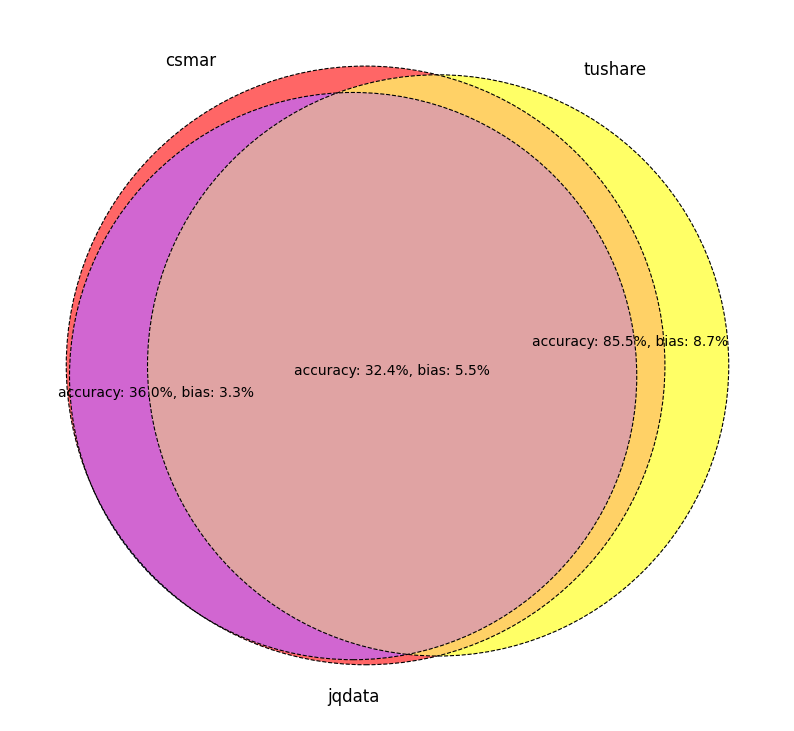

In [42]:
df4 = df1.rename(columns={'其他应付款': '其他应付款1'})[['证券代码', '会计期间', '其他应付款1']]
df5 = df2.rename(columns={'其他应付款': '其他应付款2'})[['证券代码', '会计期间', '其他应付款2']]
df6 = df3.rename(columns={'其他应付款': '其他应付款3'})[['证券代码', '会计期间', '其他应付款3']]
df7 = pd.merge(pd.merge(pd.merge(header, df4, on=['证券代码', '会计期间'], how='left'), df5, on=['证券代码', '会计期间'], how='left'), df6, on=['证券代码', '会计期间'], how='left')
df8 = df7[['证券代码', '会计期间', '其他应付款' + '1', '其他应付款' + '2', '其他应付款' + '3']]
ar = np.arange(len(df8))
subsets = [set(ar[~df8['其他应付款' + '1'].isna()]), set(ar[~df8['其他应付款' + '2'].isna()]), set(ar[~df8['其他应付款' + '3'].isna()])]
plt.figure(figsize=(10, 10))
G = venn3(subsets, set_labels=('csmar', 'tushare', 'jqdata'), alpha=0.6, set_colors=("#FF0000", "#FFFF00", "#0000FF"))
df9 = df8[(~df8['其他应付款' + '1'].isna()) & (~df8['其他应付款' + '2'].isna())]
df10 = df9[df9['其他应付款' + '1'] != df9['其他应付款' + '2']]
acc1 = (df9['其他应付款' + '1'] == df9['其他应付款' + '2']).mean()
bias1 = 2*(df10['其他应付款' + '1'] - df10['其他应付款' + '2']).abs().sum()/(df10['其他应付款' + '1'].abs().sum() + df10['其他应付款' + '2'].abs().sum())
try:
    G.get_label_by_id('110').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc1, 100*bias1))
    df11 = df8[(~df8['其他应付款' + '1'].isna()) & (~df8['其他应付款' + '3'].isna())]
    df12 = df11[df11['其他应付款' + '1'] != df11['其他应付款' + '3']]
    acc2 = (df11['其他应付款' + '1'] == df11['其他应付款' + '3']).mean()
    bias2 = 2*(df12['其他应付款' + '1'] - df12['其他应付款' + '3']).abs().sum()/(df12['其他应付款' + '1'].abs().sum() + df12['其他应付款' + '3'].abs().sum())
except:
    pass
try:
    G.get_label_by_id('101').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc2, 100*bias2))
    df13 = df8[(~df8['其他应付款' + '2'].isna()) & (~df8['其他应付款' + '3'].isna())]
    df14 = df13[df13['其他应付款' + '2'] != df13['其他应付款' + '3']]
    acc3 = (df13['其他应付款' + '2'] == df13['其他应付款' + '3']).mean()
    bias3 = 2*(df14['其他应付款' + '2'] - df14['其他应付款' + '3']).abs().sum()/(df14['其他应付款' + '2'].abs().sum() + df14['其他应付款' + '3'].abs().sum())
except:
    pass
try:
    G.get_label_by_id('011').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc3, 100*bias3))
    df15 = df8[(~df8['其他应付款' + '1'].isna()) & (~df8['其他应付款' + '2'].isna()) & (~df8['其他应付款' + '3'].isna())]
    df16 = df15[~((df15['其他应付款' + '1'] == df15['其他应付款' + '2']) & (df15['其他应付款' + '2'] == df15['其他应付款' + '3']))]
    acc4 = ((df15['其他应付款' + '1'] == df15['其他应付款' + '2']) & (df15['其他应付款' + '2'] == df15['其他应付款' + '3'])).mean()
    bias4 = ((df16['其他应付款' + '1'] - df16['其他应付款' + '2']).abs().sum() + (df16['其他应付款' + '1'] - df16['其他应付款' + '3']).abs().sum() + (df16['其他应付款' + '2'] - df16['其他应付款' + '3']).abs().sum())/(df16['其他应付款' + '1'].abs().sum() + df16['其他应付款' + '2'].abs().sum() + df16['其他应付款' + '3'].abs().sum())
except:
    pass
try:
    G.get_label_by_id('111').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc4, 100*bias4))
except:
    pass
try:
    G.get_label_by_id('100').set_text('')
except:
    pass
try:
    G.get_label_by_id('010').set_text('')
except:
    pass
try:
    G.get_label_by_id('001').set_text('')
except:
    pass
G = venn3_circles(subsets, linestyle='--', linewidth=0.8, color="black")
plt.show()

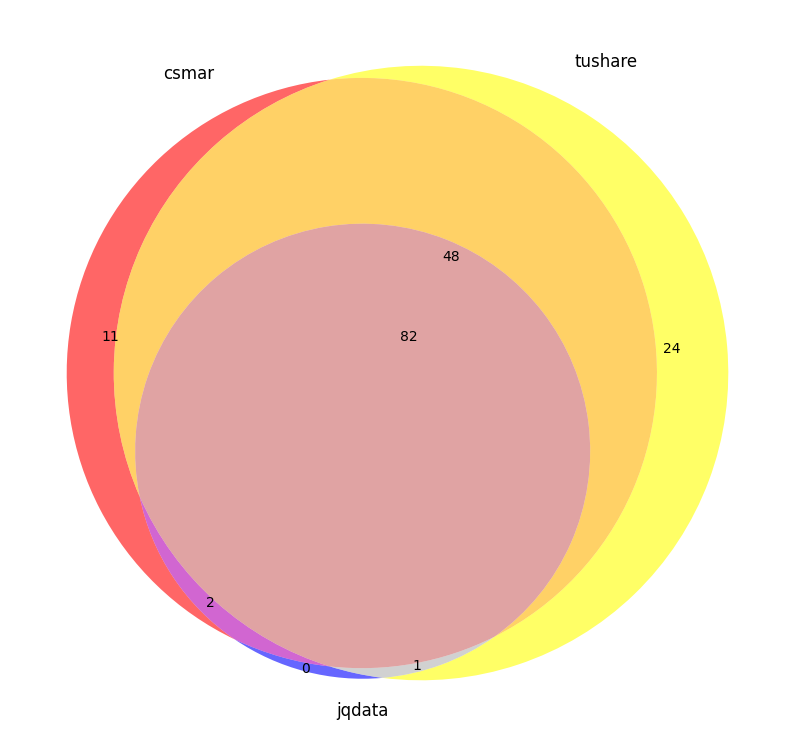

In [5]:
subsets = [set(df1.columns), set(df2.columns), set(df3.columns)]
plt.figure(figsize=(10, 10))
venn3(subsets, set_labels=('csmar', 'tushare', 'jqdata'), alpha=0.6, set_colors=("#FF0000", "#FFFF00", "#0000FF"))
plt.show()

In [28]:
col = list(set(df1.columns) & set(df2.columns) & set(df3.columns))
col.sort()
df4 = df1[col]
df5 = df2[col]
df6 = df3[col]
df4.columns = [i + '1' if i not in ['证券代码', '会计期间'] else i for i in col]
df5.columns = [i + '2' if i not in ['证券代码', '会计期间'] else i for i in col]
df6.columns = [i + '3' if i not in ['证券代码', '会计期间'] else i for i in col]
col.remove('证券代码')
col.remove('会计期间')
col.remove('查询成功')

In [50]:
print([x for x in df1.columns if '差错更正披露日期' in x])
print([x for x in df2.columns if '差错更正披露日期' in x])
print([x for x in df3.columns if '差错更正披露日期' in x])

['差错更正披露日期']
[]
[]


In [45]:
s1.sort()
s1

['一年内到期的非流动负债',
 '一年内到期的非流动资产',
 '一般风险准备',
 '专项储备',
 '专项应付款',
 '买入返售金融资产',
 '交易席位费',
 '交易性金融负债',
 '交易性金融资产',
 '交易风险准备',
 '代理业务负债',
 '代理业务资产',
 '代理买卖证券款',
 '代理承销证券款',
 '以公允价值计量且其变动计入其他综合收益的金融资产',
 '以摊余成本计量的金融资产',
 '优先股',
 '会计期间',
 '使用权资产',
 '保户储金及投资款',
 '保户质押贷款',
 '保险合同准备金',
 '债权投资',
 '公司类型',
 '公告日期',
 '其他债权投资',
 '其他应付款',
 '其他应收款',
 '其他权益工具',
 '其他权益工具投资',
 '其他流动负债',
 '其他流动资产',
 '其他综合收益',
 '其他负债',
 '其他资产',
 '其他非流动负债',
 '其他非流动资产',
 '其他非流动金融资产',
 '卖出回购金融资产款',
 '发放贷款及垫款',
 '可供出售金融资产',
 '合同负债',
 '合同资产',
 '同业及其它金融机构存放款项',
 '向中央银行借款',
 '吸收存款',
 '吸收存款及同业存放',
 '商誉',
 '固定资产',
 '固定资产清理',
 '在建工程',
 '外币报表折算差额',
 '存入保证金',
 '存出保证金',
 '存出资本保证金',
 '存放同业及其它金融机构款项',
 '存放同业款项',
 '存货',
 '定期存款',
 '实收资本(或股本)',
 '客户备付金',
 '客户资金存款',
 '寿险责任准备金',
 '少数股东权益',
 '工程物资',
 '差错更正披露日期',
 '库存股',
 '应交税费',
 '应付保单红利',
 '应付债券',
 '应付分保账款',
 '应付利息',
 '应付手续费及佣金',
 '应付款项',
 '应付短期债券',
 '应付短期融资款',
 '应付票据',
 '应付票据及应付账款',
 '应付职工薪酬',
 '应付股利',
 '应付账款',
 '应付赔付款',
 '应收代位追偿款',
 '应收保费',
 '应收分保合同准备金',
 '应收分保寿险责任准备金',
 '应收分保未决赔款准备金',
 '应收分保未

In [44]:
s1 = list((set(df1.columns) | set(df2.columns)) | set(df3.columns))
s2 = list((set(df1.columns) | set(df2.columns)) | set(df3.columns))
similar = np.array([[sm(None, i, j).ratio() for j in s2] for i in s1])
i_, j_ = np.unravel_index(np.arange(similar.shape[0]*similar.shape[1]).reshape(similar.shape)[similar != 0][similar[similar != 0].argsort()[::-1]], similar.shape)
for i, j in zip(i_, j_):
    if s1[i] != s2[j]:
        print(s1[i], s2[j])

其他流动负债 其他非流动负债
其他流动资产 其他非流动资产
流动资产合计 非流动资产合计
其他非流动资产 其他流动资产
流动负债合计 非流动负债合计
其他非流动负债 其他流动负债
非流动负债合计 流动负债合计
非流动资产合计 流动资产合计
其他非流动资产 其他非流动金融资产
其他非流动金融资产 其他非流动资产
长期应付职工薪酬 应付职工薪酬
应付职工薪酬 长期应付职工薪酬
其他权益工具 其他权益工具投资
其他权益工具投资 其他权益工具
存放同业及其它金融机构款项 同业及其它金融机构存放款项
同业及其它金融机构存放款项 存放同业及其它金融机构款项
存出保证金 存出资本保证金
应收分保长期健康险责任准备金 长期健康险责任准备金
存出资本保证金 存出保证金
长期股权投资 长期债权投资
应收分保账款 应付分保账款
长期健康险责任准备金 应收分保长期健康险责任准备金
应付分保账款 应收分保账款
长期债权投资 长期股权投资
一年内到期的非流动负债 一年内到期的非流动资产
一年内到期的非流动资产 一年内到期的非流动负债
应收账款 应收分保账款
应收分保账款 应收账款
应收款项融资 应收款项
应付短期债券 应付债券
其他应收款 其他应付款
应收分保未到期责任准备金 未到期责任准备金
负债及股东权益合计 股东权益合计
其他负债 其他流动负债
应收分保长期健康险责任准备金 应收分保寿险责任准备金
长期应收款 长期应付款
长期债权投资 长期投资
长期投资 长期股权投资
长期债权投资 债权投资
其他非流动金融资产 其他流动资产
存出保证金 存入保证金
股东权益合计 负债及股东权益合计
其他应付款 其他应收款
应付债券 应付短期债券
其他流动负债 其他负债
流动负债合计 负债合计
长期投资 长期债权投资
长期负债合计 负债合计
未到期责任准备金 应收分保未到期责任准备金
债权投资 长期债权投资
其他资产 其他流动资产
长期应付款 长期应收款
应收分保寿险责任准备金 应收分保长期健康险责任准备金
债权投资 其他债权投资
应付账款 应付分保账款
应付分保账款 应付账款
其他流动资产 其他资产
固定资产清理 固定资产
存入保证金 存出保证金
其他流动资产 其他非流动金融资产
固定资产 固定资产清理
负债合计 长期负债合计
长期股权投资 长期投资
应收款项 应收款项融资
其他债权投资 债权投资
负债

In [46]:
df7 = pd.merge(pd.merge(pd.merge(header, df4, on=['证券代码', '会计期间'], how='left'), df5, on=['证券代码', '会计期间'], how='left'), df6, on=['证券代码', '会计期间'], how='left')
df7

,证券代码,会计期间,其他应付款1,其他应付款2,其他应付款3
0,1,1990-03-31,NaN,NaN,NaN
1,1,1990-06-30,NaN,NaN,NaN
2,1,1990-09-30,NaN,NaN,NaN
3,1,1990-12-31,NaN,NaN,NaN
4,1,1991-03-31,NaN,NaN,NaN
...,...,...,...,...,...
661404,689009,2022-03-31,1.764168e+08,NaN,1.764168e+08
661405,689009,2022-06-30,2.257209e+08,NaN,2.257209e+08
661406,689009,2022-09-30,3.171645e+08,NaN,3.171645e+08
661407,689009,2022-12-31,3.655196e+08,NaN,3.655196e+08


In [ ]:
for i in range(len(col)):
    df8 = df7[['证券代码', '会计期间', col[i] + '1', col[i] + '2', col[i] + '3']]
    ar = np.arange(len(df8))
    subsets = [set(ar[~df8[col[i] + '1'].isna()]), set(ar[~df8[col[i] + '2'].isna()]), set(ar[~df8[col[i] + '3'].isna()])]
    plt.figure(figsize=(5, 5))
    G = venn3(subsets, set_labels=('csmar', 'tushare', 'jqdata'), alpha=0.6, set_colors=("#FF0000", "#FFFF00", "#0000FF"))
    df9 = df8[(~df8[col[i] + '1'].isna()) & (~df8[col[i] + '2'].isna())]
    df10 = df9[df9[col[i] + '1'] != df9[col[i] + '2']]
    acc1 = (df9[col[i] + '1'] == df9[col[i] + '2']).mean()
    bias1 = 2*(df10[col[i] + '1'] - df10[col[i] + '2']).abs().sum()/(df10[col[i] + '1'].abs().sum() + df10[col[i] + '2'].abs().sum())
    try:
        G.get_label_by_id('110').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc1, 100*bias1))
        df11 = df8[(~df8[col[i] + '1'].isna()) & (~df8[col[i] + '3'].isna())]
        df12 = df11[df11[col[i] + '1'] != df11[col[i] + '3']]
        acc2 = (df11[col[i] + '1'] == df11[col[i] + '3']).mean()
        bias2 = 2*(df12[col[i] + '1'] - df12[col[i] + '3']).abs().sum()/(df12[col[i] + '1'].abs().sum() + df12[col[i] + '3'].abs().sum())
    except:
        pass
    try:
        G.get_label_by_id('101').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc2, 100*bias2))
        df13 = df8[(~df8[col[i] + '2'].isna()) & (~df8[col[i] + '3'].isna())]
        df14 = df13[df13[col[i] + '2'] != df13[col[i] + '3']]
        acc3 = (df13[col[i] + '2'] == df13[col[i] + '3']).mean()
        bias3 = 2*(df14[col[i] + '2'] - df14[col[i] + '3']).abs().sum()/(df14[col[i] + '2'].abs().sum() + df14[col[i] + '3'].abs().sum())
    except:
        pass
    try:
        G.get_label_by_id('011').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc3, 100*bias3))
        df15 = df8[(~df8[col[i] + '1'].isna()) & (~df8[col[i] + '2'].isna()) & (~df8[col[i] + '3'].isna())]
        df16 = df15[~((df15[col[i] + '1'] == df15[col[i] + '2']) & (df15[col[i] + '2'] == df15[col[i] + '3']))]
        acc4 = ((df15[col[i] + '1'] == df15[col[i] + '2']) & (df15[col[i] + '2'] == df15[col[i] + '3'])).mean()
        bias4 = ((df16[col[i] + '1'] - df16[col[i] + '2']).abs().sum() + (df16[col[i] + '1'] - df16[col[i] + '3']).abs().sum() + (df16[col[i] + '2'] - df16[col[i] + '3']).abs().sum())/(df16[col[i] + '1'].abs().sum() + df16[col[i] + '2'].abs().sum() + df16[col[i] + '3'].abs().sum())
    except:
        pass
    try:
        G.get_label_by_id('111').set_text('accuracy: %.1f%%, bias: %.1f%%' % (100*acc4, 100*bias4))
    except:
        pass
    try:
        G.get_label_by_id('100').set_text('')
    except:
        pass
    try:
        G.get_label_by_id('010').set_text('')
    except:
        pass
    try:
        G.get_label_by_id('001').set_text('')
    except:
        pass
    G = venn3_circles(subsets, linestyle='--', linewidth=0.8, color="black")
    print(i, col[i])
    plt.show()